

We are going to run a linear regression to investigate the role of price on sales.

Regression Model:

\begin{equation}
y=\beta_0 +\beta_1 x_1+...+\beta_N x_N +\epsilon
\end{equation}

*   $y$ will be our **dependent variable**
*   $x={x_1, x_2, ...,x_N}$ will be our vector of **independent variables**
* The term $\epsilon$ captures all the other factors that will impact donations.



# Step 1:  Loading the necessary packages

In [1]:
import pandas as pd # Load the Python package panda for data manipulation
import numpy as np  # Load the Python package numpy for some math operations
import matplotlib.pyplot as plt # this package is used make plots
import statsmodels.api as sm

# Step 2: Load the *data*

In [2]:
url_248 = 'https://raw.githubusercontent.com/ormarketing/248/master/248.csv' # define url_248 as the link
df = pd.read_csv(url_248) # read the object url_248, which is a csv file as a dataframe

# Step 3:  Explore the Data

In [3]:
df.head(5) # return the first 5 rows and columns of the data

,WEEK,UNITS1,REGPR1,CUT1,FEAT1,DISP1,UNITS2,REGPR2,CUT2,FEAT2,...,UNITS3,REGPR3,CUT3,FEAT3,DISP3,UNITS4,REGPR4,CUT4,FEAT4,DISP4
0,1,144,1.3303,0.0,0,0.0,569,0.9355,0.0000,0,...,19,1.0689,0.0000,0,0.0,89,0.8293,0.0,0,0.0
1,2,229,1.3127,0.0,0,0.0,276,0.9478,0.0000,0,...,88,1.0689,0.1434,0,0.0,73,0.8900,0.0,0,0.0
2,3,244,1.2900,0.0,0,0.0,122,0.9809,0.0000,0,...,1519,1.0685,0.0000,0,0.0,66,0.8900,0.0,0,0.0
3,4,214,1.2900,0.0,0,0.0,481,0.9809,0.0637,0,...,411,1.0685,0.0487,0,0.0,55,0.8900,0.0,0,0.0
4,5,261,1.2900,0.0,0,0.0,506,0.9809,0.0620,0,...,87,1.0685,0.0860,0,0.0,65,0.8900,0.0,0,0.0


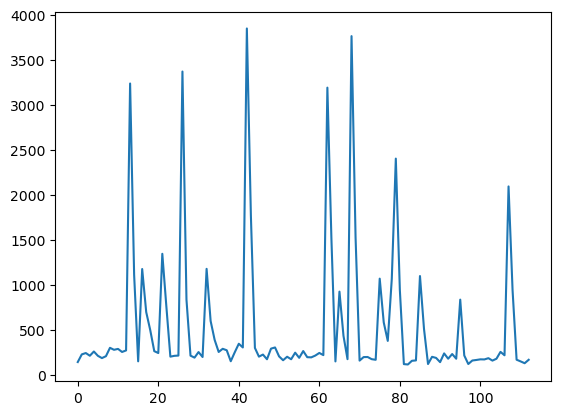

In [4]:
plt.plot(df['UNITS1'])

# Step 4: Preparing the Data for Analysis

In [5]:
price1 = df['REGPR1']-df['CUT1'] # define variable price1 as the difference between regular price and price cut
price2 = df['REGPR2']-df['CUT2']
price3 = df['REGPR3']-df['CUT3']
price4 = df['REGPR4']-df['CUT4']
df['const'] = 1 # define a vector of 1s in the dataframe
df['Price1'] = price1
df['Price2'] = price2
df['Price3'] = price3
df['Price4'] = price4

## Step 5: Run the regression

In [6]:
y_brand1 = df['UNITS1'] # define variable y the column 'UNITS1' in the dataframe. This is my DEPENDENT Variable
x_brand1 = df[['const','Price1','Price2','Price3','Price4','FEAT1','FEAT2','FEAT3','FEAT4','DISP1','DISP2','DISP3','DISP4']] #define the matrix x with all INDEPENDENT variables
reg_brand1 = sm.OLS(y_brand1,x_brand1)# do the regression
type(reg_brand1)
results = reg_brand1.fit()
type(results)
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 UNITS1   R-squared:                       0.637
Model:                            OLS   Adj. R-squared:                  0.594
Method:                 Least Squares   F-statistic:                     14.64
Date:                Fri, 03 May 2024   Prob (F-statistic):           3.70e-17
Time:                        16:12:42   Log-Likelihood:                -852.95
No. Observations:                 113   AIC:                             1732.
Df Residuals:                     100   BIC:                             1767.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1078.4482    869.111      1.241      0.2


Regression Model:
The regression equation as follows:
\begin{equation}
y= 1078.4482 + 1330.9626 \cdot \text{Price1} + 1224.9159 \cdot \text{Price2} - 1016.2242 \cdot \text{Price3} - 2948.4284 \cdot \text{Price4} + 1851.1387 \cdot \text{FEAT1} + 72.0190 \cdot \text{FEAT2} - 325.3110 \cdot \text{FEAT3} - 241.0155 \cdot \text{FEAT4} + 178.4920 \cdot \text{DISP1} + 82.4457 \cdot \text{DISP2} - 395.0749 \cdot \text{DISP3} + 1255.4248 \cdot \text{DISP4} + \epsilon 
\end{equation}

*   $y$ will be our **dependent variable**
*   $x={x_1, x_2, ...,x_N}$ will be our vector of **independent variables**
* The term $\epsilon$ captures all the other factors that will impact donations.

Where:
- y represents the predicted number of units sold.
- `Price1`, `Price2`, `Price3`, `Price4` are the differences between regular price and price cut for each product.
- `FEAT1`, `FEAT2`, `FEAT3`, `FEAT4` indicate the feature displays for each product.
- `DISP1`, `DISP2`, `DISP3`, `DISP4` represent the product displays for each product.
- $\epsilon$ denotes the error term capturing unexplained variability.

This equation allows you to predict the number of units sold based on the given independent variables (price differences, feature displays, and product displays), along with their respective coefficients obtained from the regression analysis.